Criminalidad en el Estado de Maryland-USA

Maryland es uno de los 50 estados que forma parte de los Estados Unidos y esta ubicado en la costa este. Entre los años de 2017 y 2021 tuvo una poblacion de 6112835 y 6165129 habitantes respectivamente, siendo el 19.° estado más poblado de Estados Unidos. A lo largo de los años, ha experimentado variaciones en los índices de criminalidad en diferentes áreas y periodos que a continuación seran analizados:

1. Evolución Temporal:
Examinaremos la evolución en el tiempo de la criminalidad en Maryland mediante gráficos de líneas que muestra la misma entre los años 2017-2021. Al observar las tendencias a lo largo de los años, podemos identificar períodos de disminución de la criminalidad, con una fuerte disminución del numero de victimas durante el año 2020 lo cual lo podemos atribuir a las mediddas de confinamiento por la pandemia del COVID-19.

2. Tipo de crimenes más Comunes:
Acá se hará un enfoque en los delitos más comunes en Maryland. Utilizamos gráficos de barras para mostrar los tipos de delitos y el numero de victimas. Identificamos los tipos de delitos más frecuentes, como lo son los crimenes contra la propiedad.

3. Comparación de Ciudades:
Dado que Maryland tiene varias ciudades importantes, podemos realizar una comparación de la cantidad de delitos entre ellas. Se creo un gráfico de barras que muestra la cantidad de delitos en las diferentes ciudades donde destaca la ciudad de Silver Spring como la ciudad con mayor cantidad de crimenes y delitos cometidos. Esta comparación, tambien nos permite identificar las ciudades con mayor y menor numero de delitos.


Conclusión:
A través de este análisis de la criminalidad en Maryland, hemos identificado tendencias que nos ayudan a comprender mejor la situación en el estado. Este enfoque basado en datos nos permite tomar decisiones más informadas sobre políticas de seguridad, asignación de recursos y programas de prevención del delito con la finalidad de tener un entorno más seguro y próspero para todos los residentes del estado de Maryland.

### Importación de dataset y librerias

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
#Importacion de librerias

#Manipulación de datos y visualizaciones
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import missingno as msno

### Dataset original

In [3]:
#Importacion de dataset
df_crimes = pd.read_csv('/content/gdrive/MyDrive/data_science/11va_entrega/Crime.csv')

<ipython-input-3-1a42f60f0e64>:2: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crimes = pd.read_csv('/content/gdrive/MyDrive/data_science/11va_entrega/Crime.csv')


In [4]:
df_crimes.head(5)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [5]:
df_crimes.shape
print(f'Cantidad de filas en el dataset es de {df_crimes.shape[0]} y {df_crimes.shape[1]} filas')

Cantidad de filas en el dataset es de 306094 y 30 filas


In [6]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [7]:
print('RESUMEN DE DATOS NULOS')

df_crimes.isnull().sum()

RESUMEN DE DATOS NULOS


Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

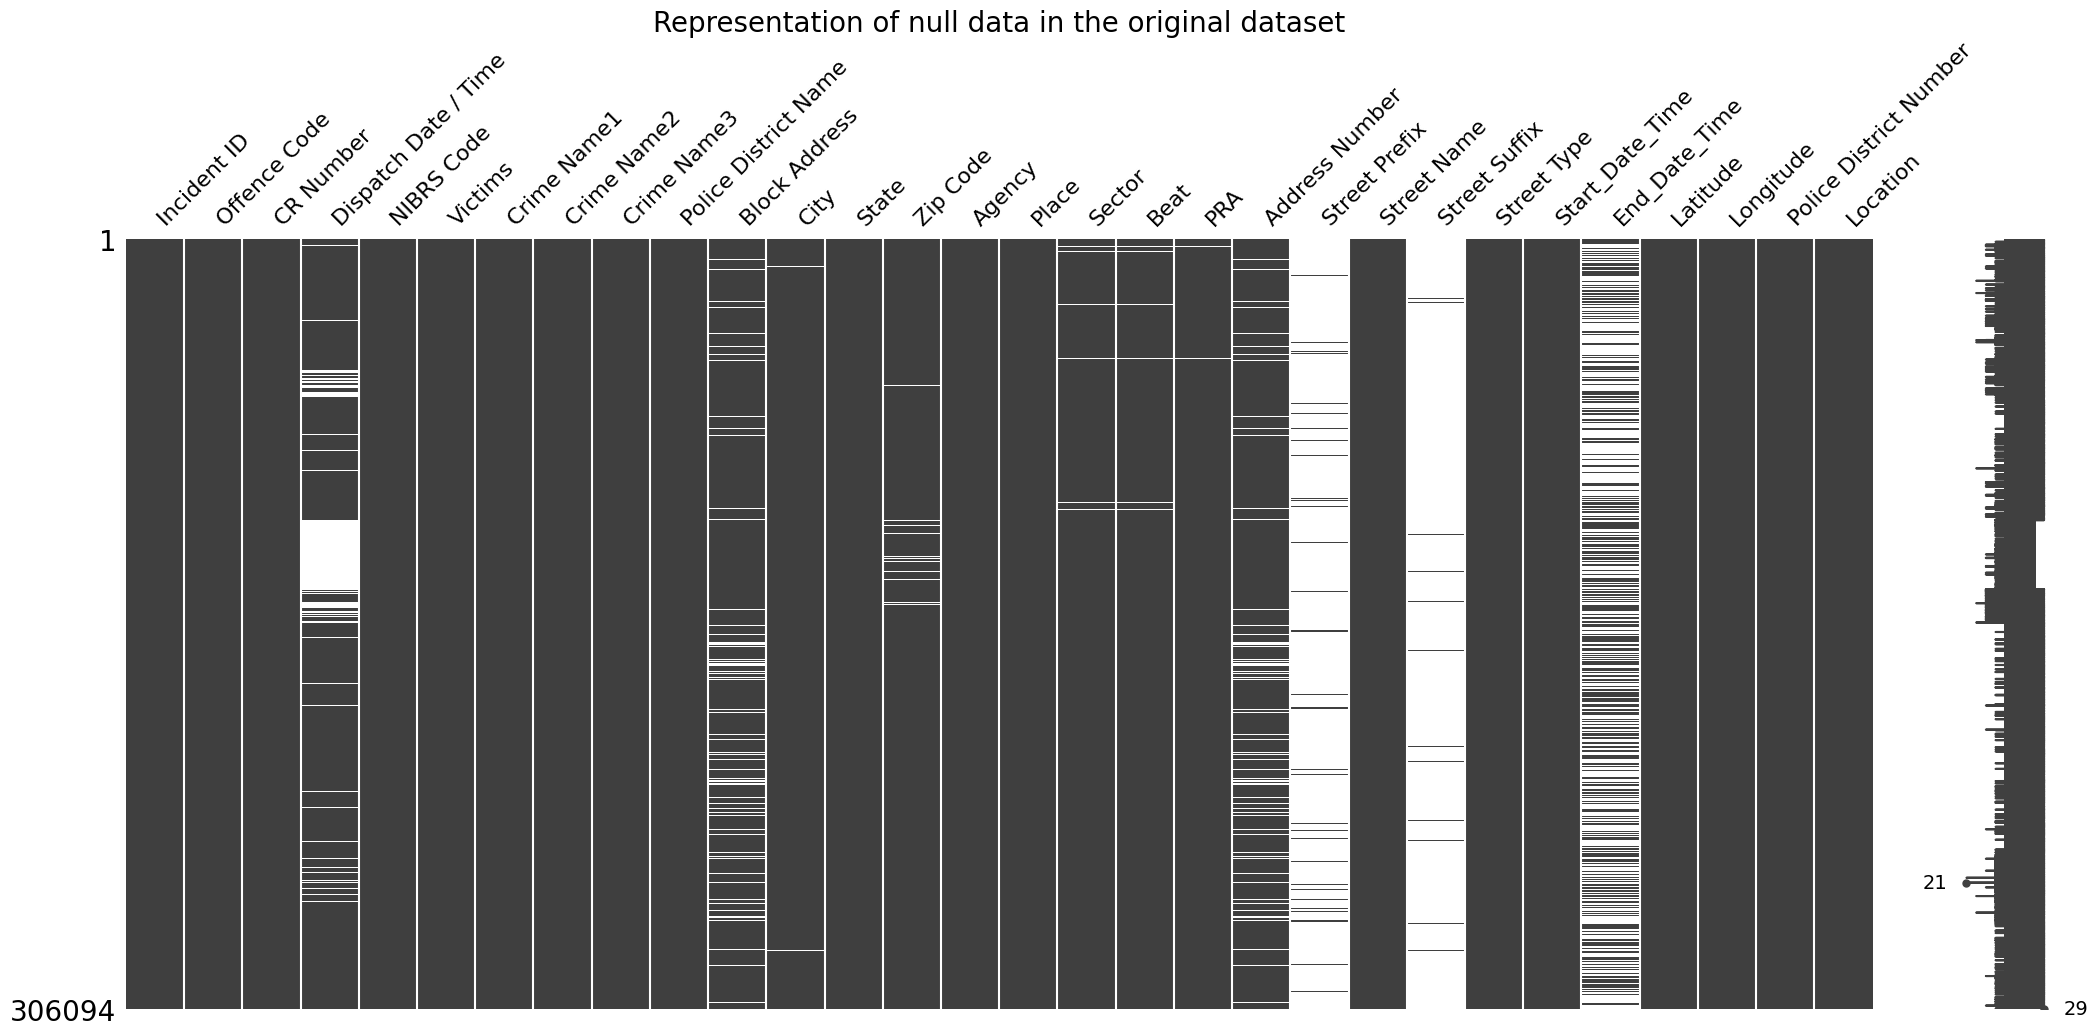

In [8]:
msno.matrix(df_crimes)
plt.title('Representation of null data in the original dataset', fontsize=20)
plt.show()

In [9]:
#Datos duplicados en el dataset
df_crimes.duplicated().sum()

0

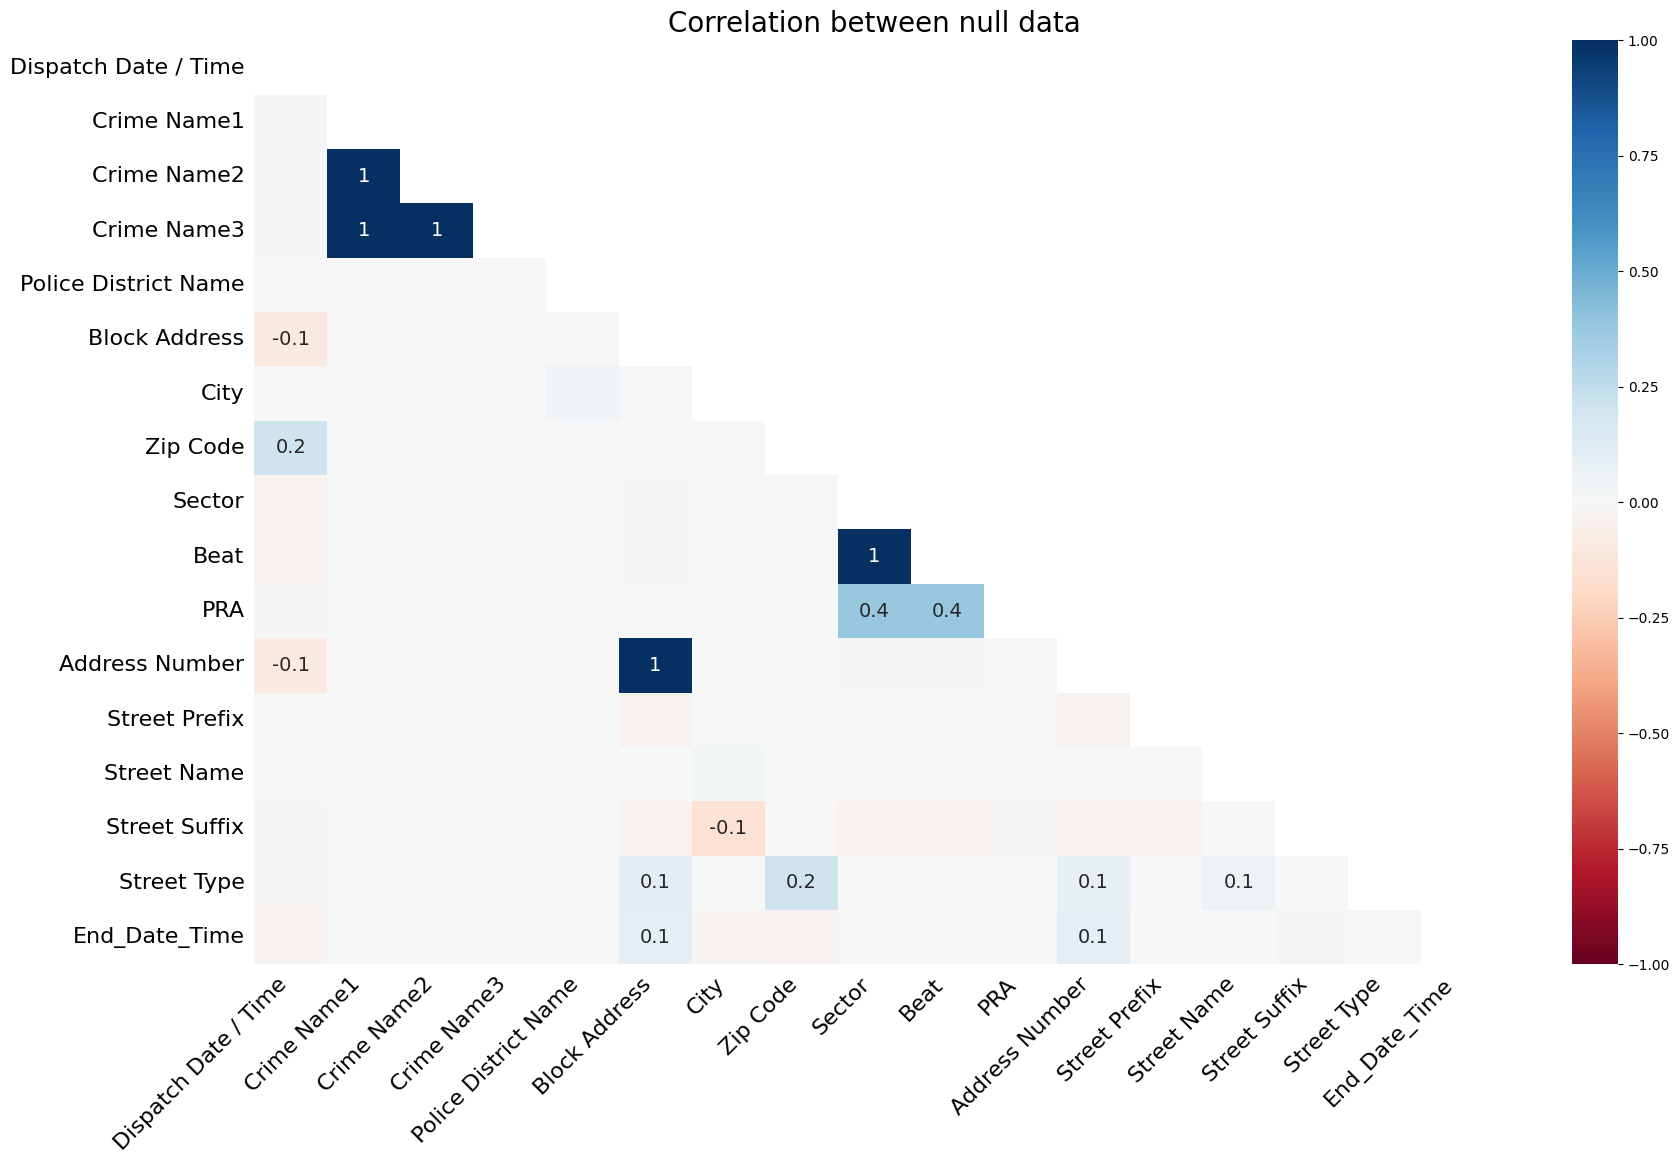

In [10]:
msno.heatmap(df_crimes)
plt.title('Correlation between null data', fontsize=20)
plt.show()

### Tratamiento y limpieza del dataset

In [11]:
#copia del dataset original
df_crimes2 = df_crimes.copy()

In [12]:
#Nombre columnas se pasan a letras minusculas
df_crimes2.columns = df_crimes2.columns.str.lower()

In [13]:
#Se reemplazan espacios en blanco en nombre de columnas
df_crimes2.columns = df_crimes2.columns.str.replace(' ','_')

In [14]:
df_crimes2.head(5)

,incident_id,offence_code,cr_number,dispatch_date_/_time,nibrs_code,victims,crime_name1,crime_name2,crime_name3,police_district_name,...,street_prefix,street_name,street_suffix,street_type,start_date_time,end_date_time,latitude,longitude,police_district_number,location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


In [15]:
#Se filtran columnas de interes(Se eliminan columnas no utiles)
df_crimes2=df_crimes2.drop(columns=['dispatch_date_/_time', 'incident_id','offence_code', 'cr_number',
       'nibrs_code','block_address','zip_code', 'agency', 'beat', 'pra','address_number',
       'street_prefix', 'street_suffix', 'end_date_time','sector', 'street_name', 'police_district_number'])

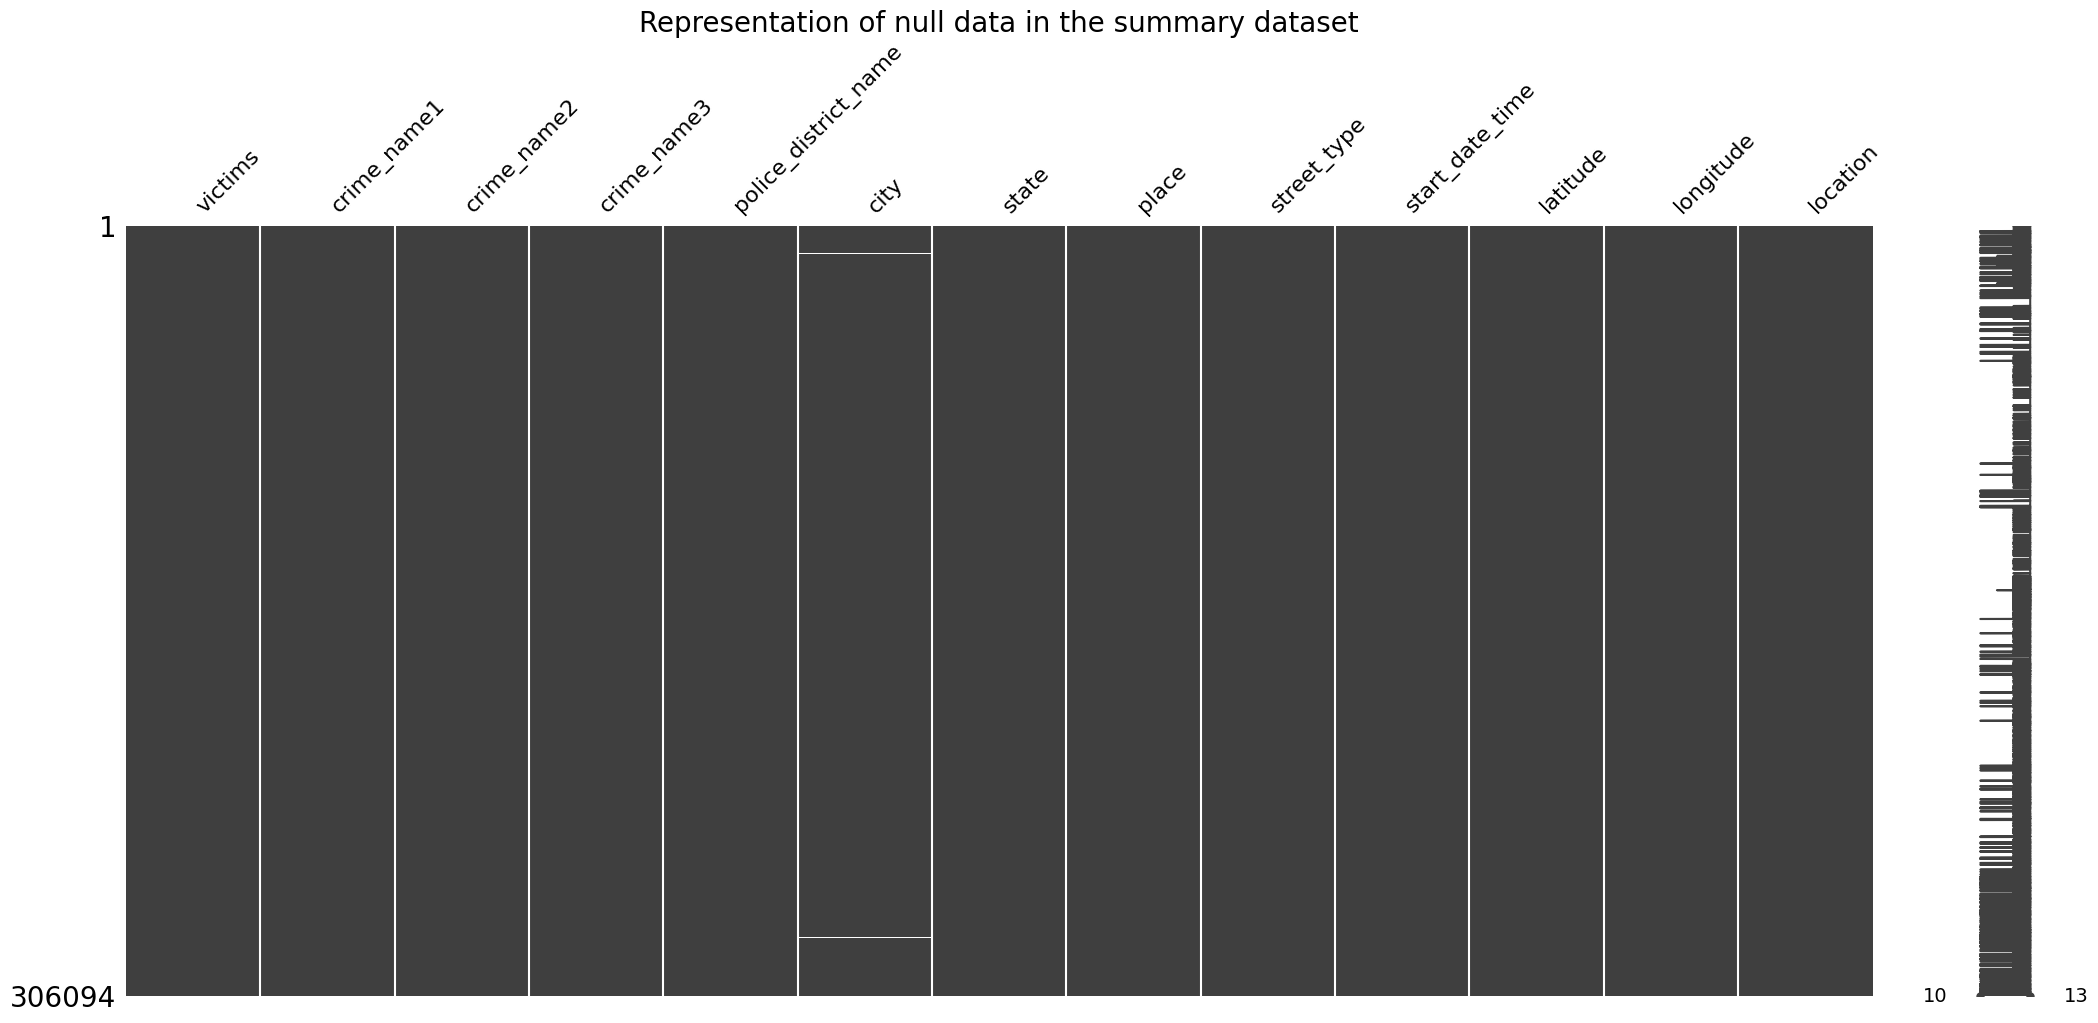

In [16]:
msno.matrix(df_crimes2)
plt.title('Representation of null data in the summary dataset', fontsize=20)
plt.show()

In [17]:
print('RESUMEN DE DATOS NULOS EN DATASET COPIA')

df_crimes2.isnull().sum()

RESUMEN DE DATOS NULOS EN DATASET COPIA


victims                    0
crime_name1              272
crime_name2              272
crime_name3              272
police_district_name      94
city                    1276
state                      0
place                      0
street_type              339
start_date_time            0
latitude                   0
longitude                  0
location                   0
dtype: int64

In [18]:
# Eliminacion de datos nulos
df_crimes2_clean = df_crimes2.dropna(subset=['crime_name1','crime_name2','crime_name3','police_district_name', 'city', 'street_type'])

In [19]:
df_crimes2_clean.isnull().sum()

victims                 0
crime_name1             0
crime_name2             0
crime_name3             0
police_district_name    0
city                    0
state                   0
place                   0
street_type             0
start_date_time         0
latitude                0
longitude               0
location                0
dtype: int64

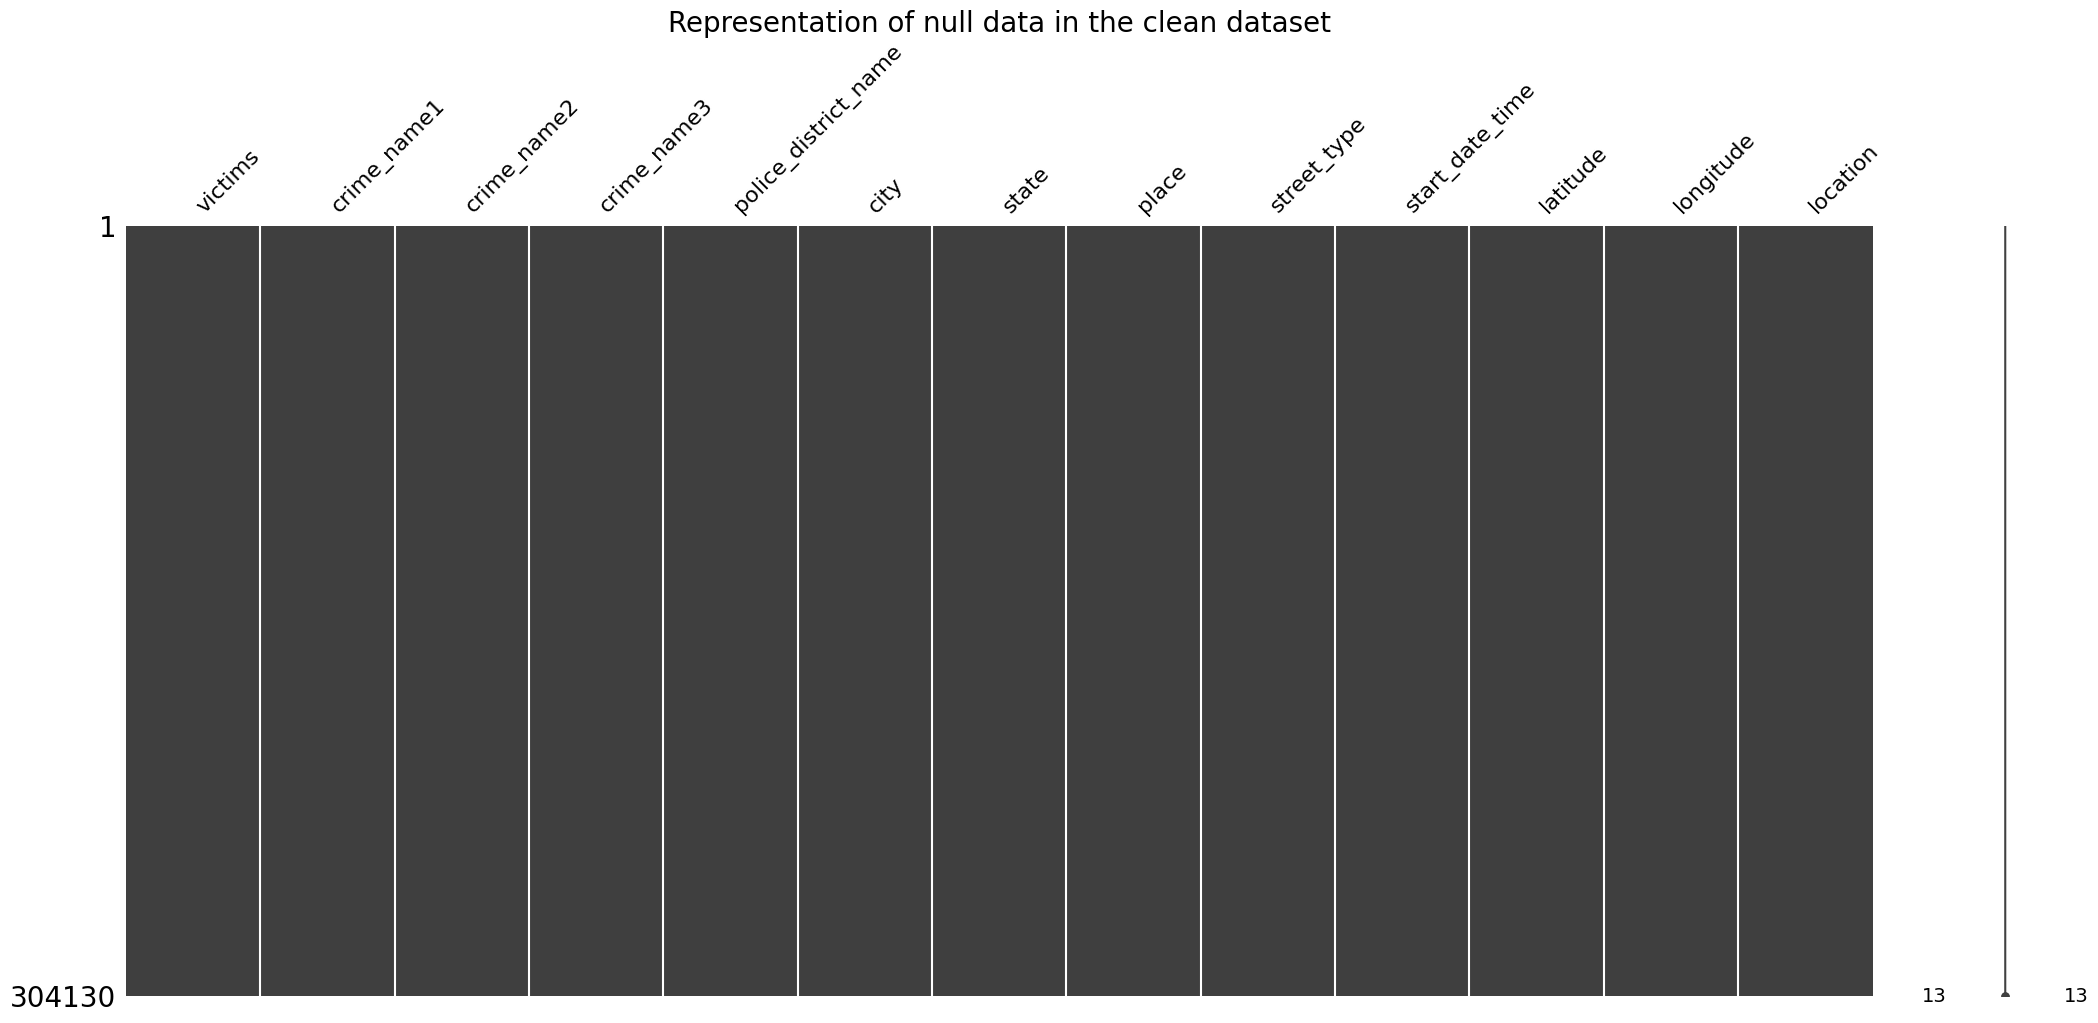

In [20]:
msno.matrix(df_crimes2_clean)
plt.title('Representation of null data in the clean dataset', fontsize=20)
plt.show()

In [21]:
porcentaje_filas_eliminadas = round(((df_crimes.shape[0]-df_crimes2_clean.shape[0])/df_crimes.shape[0])*100, 2)
print(f'La estrategia para tratar los datos nulos fue su eliminación ya que los mismos solo representan el {porcentaje_filas_eliminadas} % de los datos totales del dataset')

La estrategia para tratar los datos nulos fue su eliminación ya que los mismos solo representan el 0.64 % de los datos totales del dataset


### Graficos

In [34]:
df_graficos = df_crimes2_clean

In [35]:
df_graficos['start_date_time']=pd.to_datetime(df_graficos['start_date_time'] )

<ipython-input-35-e31859dfc20f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graficos['start_date_time']=pd.to_datetime(df_graficos['start_date_time'] )


In [36]:
#Extraccion de año y mes en columnas
df_graficos['year']= pd.DatetimeIndex(df_graficos['start_date_time']).year
df_graficos['month']= pd.DatetimeIndex(df_graficos['start_date_time']).month

<ipython-input-36-71275223d1bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graficos['year']= pd.DatetimeIndex(df_graficos['start_date_time']).year
<ipython-input-36-71275223d1bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graficos['month']= pd.DatetimeIndex(df_graficos['start_date_time']).month


In [37]:
#Se pasa columna 'year' como indice del dataframe
df_graficos = df_graficos.set_index('year')

In [38]:
#Filtrado por años completos
df_graficos = df_graficos[df_graficos.index.isin([2017,2018,2019,2020,2021])]

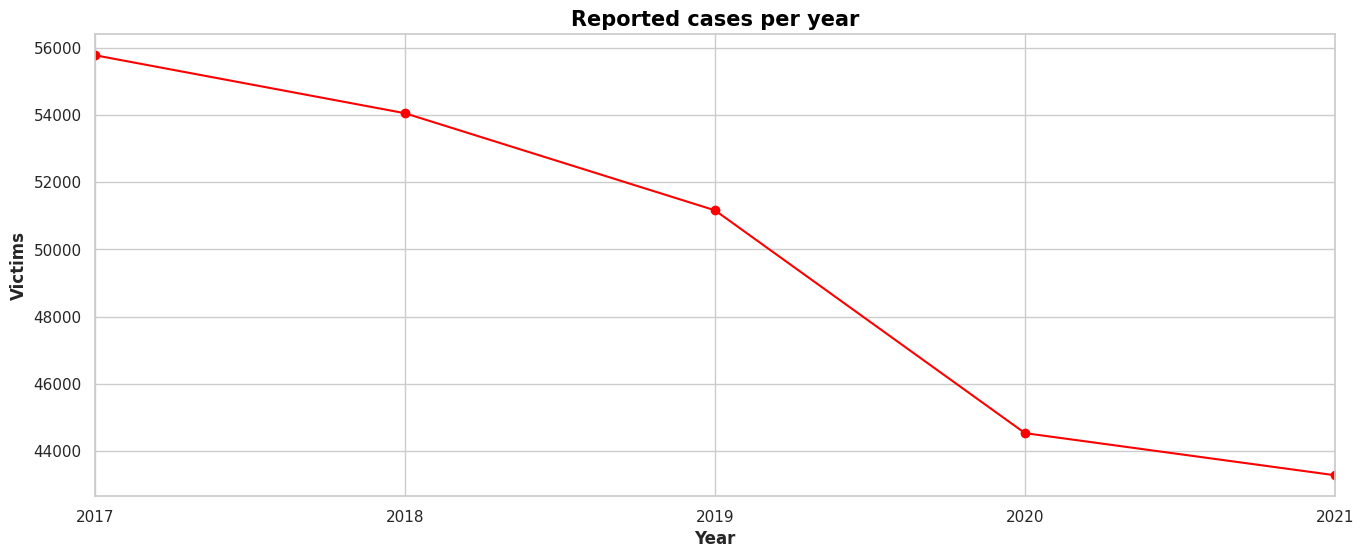

In [39]:
#Grafica de crimenes reportados por año
fig, ax = plt.subplots(figsize=(16,6))
total_crimes_year = df_graficos.groupby(df_graficos['start_date_time'].dt.to_period('Y')).size()
total_crimes_year.plot.line(color='red', marker= 'o')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
ax.set_title('Reported cases per year', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

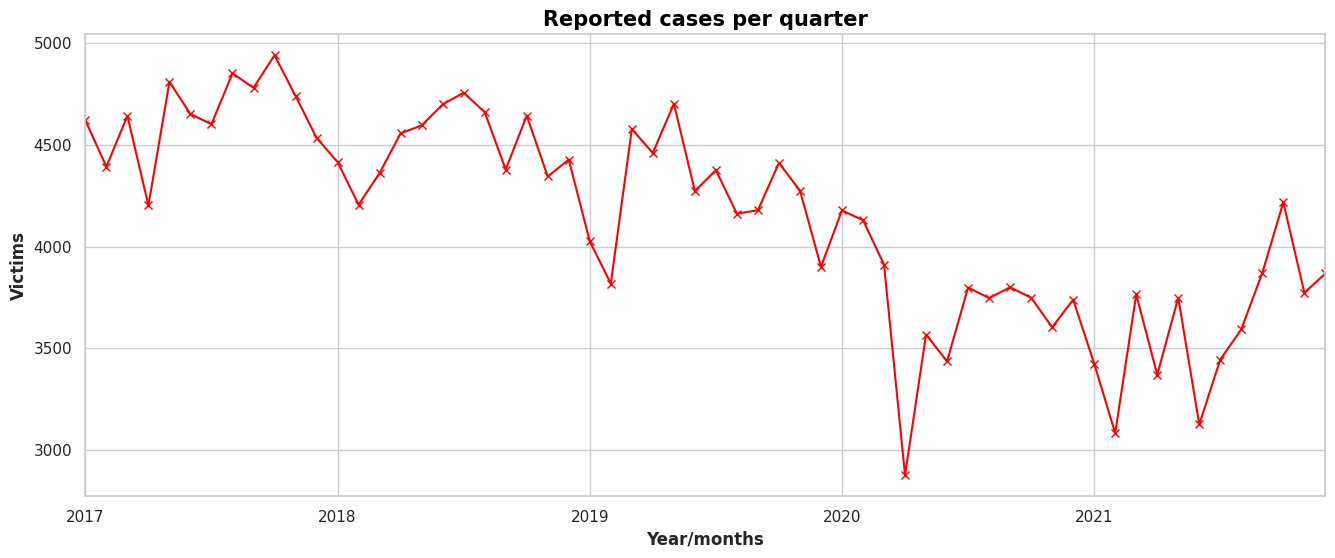

In [40]:
#Grafica de crimenes reportados mensualmente/trimestre
fig, ax = plt.subplots(figsize=(16,6))
total_crimes_years = df_graficos.groupby(df_graficos['start_date_time'].dt.to_period('M')).size()
total_crimes_years.plot.line(color='red', marker= 'x')
ax.set_xlabel('Year/months', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
ax.set_title('Reported cases per quarter', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

In [41]:
#Se convierte serie de datos en dataframe para cargar a Seaborn
df_crimes_damage= pd.DataFrame(df_graficos.groupby('crime_name1')['victims'].sum())
df_crimes_damage = df_crimes_damage.sort_values('victims', ascending=False)
df_crimes_damage

,victims
crime_name1,
Crime Against Property,113155
Crime Against Society,56838
Other,52092
Crime Against Person,29421
Not a Crime,2855


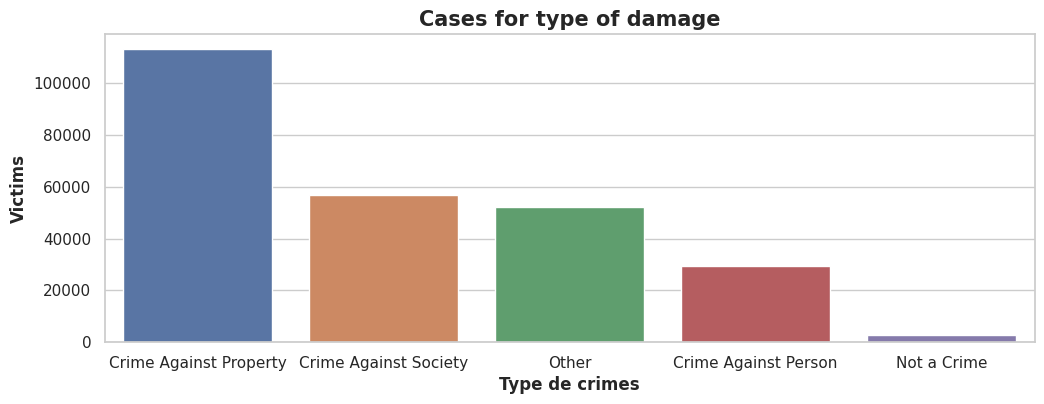

In [42]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data= df_crimes_damage, x = df_crimes_damage.index, y = "victims")
plt.title('Cases for type of damage',fontsize = 15, fontweight='bold')
plt.xlabel('Type de crimes', fontweight='bold')
plt.ylabel('Victims', fontweight='bold')
plt.show()

In [43]:
#Se convierte serie de datos en dataframe para cargar a Seaborn
df_crimes_city= pd.DataFrame(df_graficos.groupby('police_district_name')['victims'].sum())
df_crimes_city = df_crimes_city.sort_values('victims', ascending=False)
df_crimes_city

,victims
police_district_name,
SILVER SPRING,53518
WHEATON,48464
MONTGOMERY VILLAGE,43626
BETHESDA,35200
ROCKVILLE,34957
GERMANTOWN,32968
CITY OF TAKOMA PARK,5069
TAKOMA PARK,491
OTHER,68


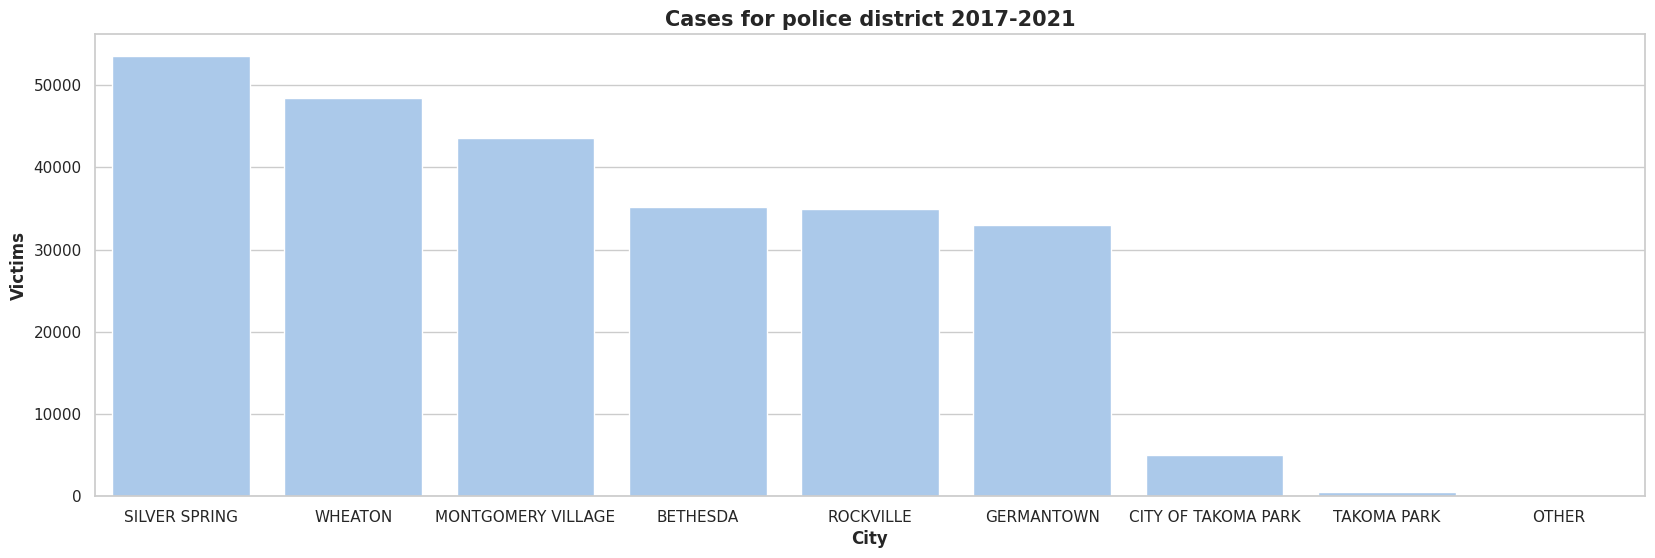

In [89]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_crimes_city.index, y="victims", data=df_crimes_city, color="b")
plt.title('Cases for police district 2017-2021', fontsize = 15, fontweight='bold')
plt.xlabel('City', fontweight='bold')
plt.ylabel('Victims', fontweight='bold')
plt.show()

In [45]:
df_crimes2_clean.head()

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
0,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,GERMANTOWN,MD,Street - In vehicle,RD,2018-08-23 21:52:00,39.177744,-77.265619,"(39.1777, -77.2656)",2018,8
1,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,BETHESDA,MD,Street - In vehicle,AVE,2018-03-30 01:01:00,38.992693,-77.097063,"(38.9927, -77.0971)",2018,3
2,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,BETHESDA,MD,Street - In vehicle,AVE,2018-03-30 01:01:00,38.992693,-77.097063,"(38.9927, -77.0971)",2018,3
3,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Hotel/Motel/Etc.,RD,2018-06-14 22:26:00,39.147954,-77.218189,"(39.148, -77.2182)",2018,6
4,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,CHEVY CHASE,MD,Residence - Single Family,AVE,2018-09-02 23:30:00,38.966174,-77.096561,"(38.9662, -77.0966)",2018,9


## **Análisis por tipo de crimen**

### **Crimenes contra la propiedad**

In [46]:
#Segmentación por tipo de crimen
df_crimes_type1 = df_crimes2_clean.loc[df_crimes2_clean.crime_name1 == 'Crime Against Property']
df_crimes_type1

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
4,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,CHEVY CHASE,MD,Residence - Single Family,AVE,2018-09-02 23:30:00,38.966174,-77.096561,"(38.9662, -77.0966)",2018,9
5,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,CHEVY CHASE,MD,Residence - Single Family,AVE,2018-09-02 23:30:00,38.966174,-77.096561,"(38.9662, -77.0966)",2018,9
10,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),WHEATON,SILVER SPRING,MD,Parking Lot - Other,LA,2016-08-28 00:00:00,39.110690,-76.962918,"(39.1107, -76.9629)",2016,8
11,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Retail - Department/Discount Store,BLV,2016-12-24 15:51:00,39.114194,-77.197117,"(39.1142, -77.1971)",2016,12
12,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,ROCKVILLE,ROCKVILLE,MD,Residence - Driveway,RD,2019-04-10 22:00:00,39.083781,-77.156818,"(39.0838, -77.1568)",2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306084,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - BUSINESS,MONTGOMERY VILLAGE,ROCKVILLE,MD,Hospital/Emergency Care Center,RD,2021-03-03 17:11:00,39.100237,-77.201179,"(39.1002, -77.2012)",2021,3
306086,1,Crime Against Property,Identity Theft,IDENTITY THEFT,WHEATON,ROCKVILLE,MD,Other/Unknown,DR,2021-03-22 15:59:00,39.122271,-77.097909,"(39.1223, -77.0979)",2021,3
306088,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,WHEATON,SILVER SPRING,MD,Gas Station,AVE,2021-05-14 20:45:00,39.041513,-77.051713,"(39.0415, -77.0517)",2021,5
306090,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,SILVER SPRING,MD,Parking Lot - Residential,DR,2021-05-06 03:15:00,39.059672,-77.075995,"(39.0597, -77.076)",2021,5


In [47]:
#Numero de victimas
v = df_crimes_type1.victims.sum()
print('El numero de victimas por crimenes contra la propiedad fue de', v)

El numero de victimas por crimenes contra la propiedad fue de 139010


In [48]:
#Agrupacion de datos por crimenes más cometidos
df_majorcrimes_type1 = pd.DataFrame(df_crimes_type1.groupby('crime_name2')['victims'].sum())
df_majorcrimes_type1 = df_majorcrimes_type1.sort_values('victims', ascending=False)
df_majorcrimes_type1

,victims
crime_name2,
Theft From Motor Vehicle,26049
Destruction/Damage/Vandalism of Property,18865
Shoplifting,15946
All other Larceny,13882
Theft from Building,11208
Burglary/Breaking and Entering,8713
Identity Theft,8656
Theft of Motor Vehicle Parts or Accessories,6633
Motor Vehicle Theft,6477


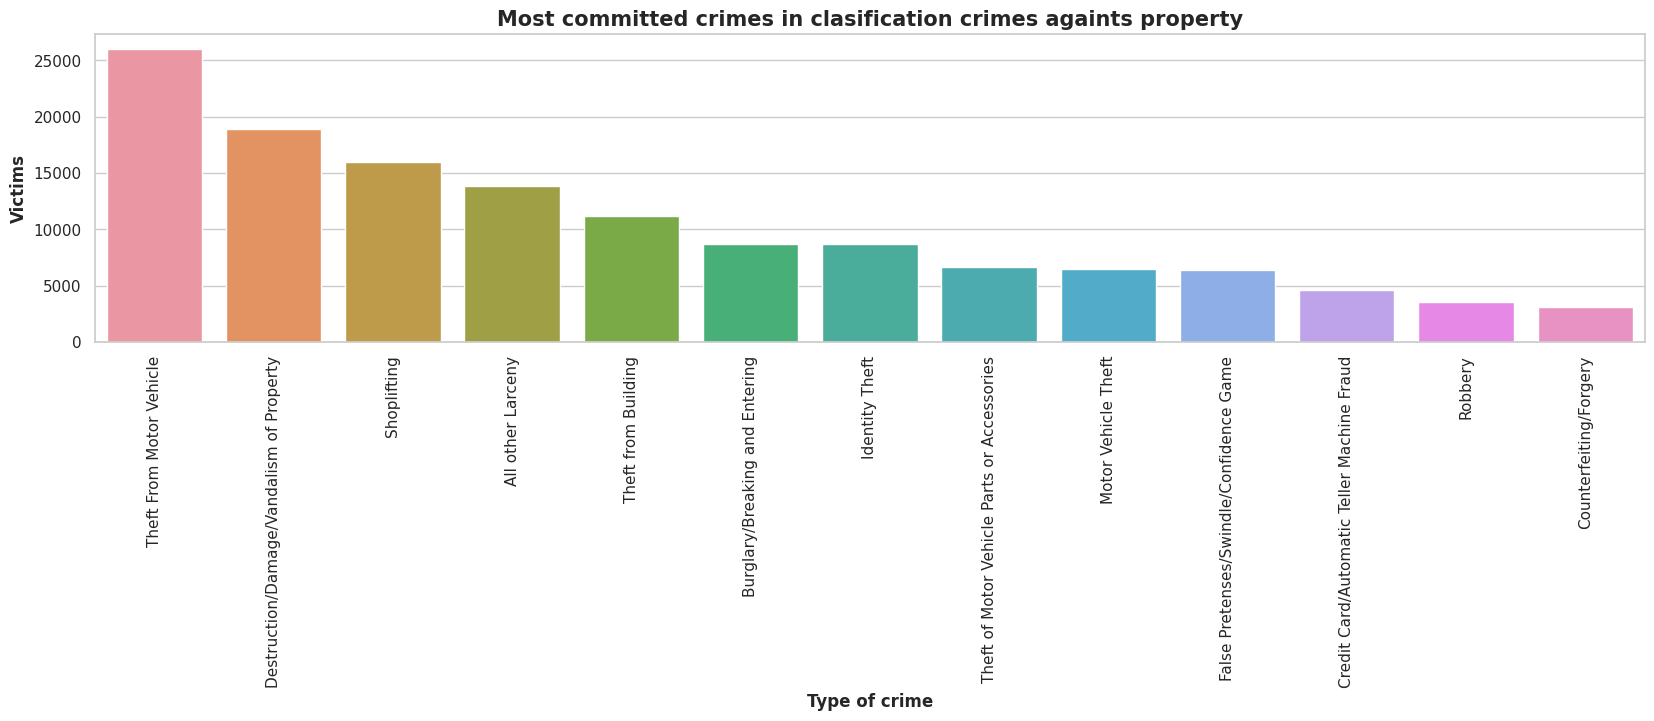

In [85]:
#Grafica
graph_crimes_type1 = df_majorcrimes_type1.loc[df_majorcrimes_type1.victims > 2000]

fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(data=graph_crimes_type1, x = graph_crimes_type1.index, y = "victims")
plt.xticks(rotation=90)
ax.set_xlabel('Type of crime', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Most committed crimes in clasification crimes againts property', fontsize = 15, fontweight='bold')
plt.show()

In [50]:
#Crimenes en ciudades
df_cities_crimetype1= pd.DataFrame(df_crimes_type1.groupby('police_district_name')['victims'].sum())
df_cities_crimetype1 = df_cities_crimetype1.sort_values('victims', ascending=False)
df_cities_crimetype1


,victims
police_district_name,
SILVER SPRING,29272
BETHESDA,24491
WHEATON,23896
MONTGOMERY VILLAGE,21844
GERMANTOWN,18350
ROCKVILLE,17474
CITY OF TAKOMA PARK,2770
TAKOMA PARK,811
OTHER,102


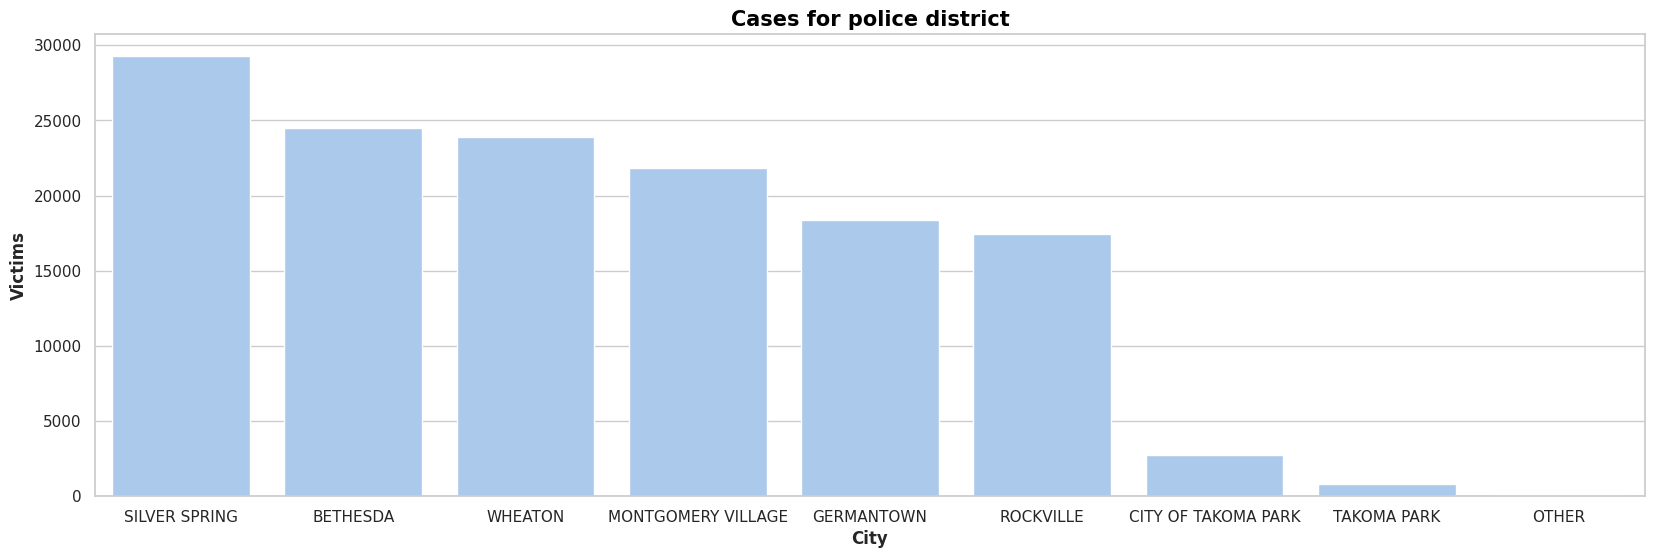

In [90]:
#Grafica crimenes en ciudades
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_cities_crimetype1.index, y="victims", data=df_cities_crimetype1, color="b")
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Cases for police district', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

En las graficas anteriores se puede observar que en el periodo de tiempo estudiado 2017-2021 hubo un total de 139010 vicitimas, el delito más llevado a cabo fue el robo de vehiculo automotor con un total de 26049 casos y la ciudad con más actos delictivos del tipo **contra la propiedad** fue Silver Spring con un total de 29272 casos registrados.

### **Crimenes contra la sociedad**

In [52]:
#Segmentación por tipo de crimen
df_crimes_type2 = df_crimes2_clean.loc[df_crimes2_clean.crime_name1 == 'Crime Against Society']
df_crimes_type2

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
0,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,GERMANTOWN,MD,Street - In vehicle,RD,2018-08-23 21:52:00,39.177744,-77.265619,"(39.1777, -77.2656)",2018,8
1,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,BETHESDA,MD,Street - In vehicle,AVE,2018-03-30 01:01:00,38.992693,-77.097063,"(38.9927, -77.0971)",2018,3
2,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,BETHESDA,MD,Street - In vehicle,AVE,2018-03-30 01:01:00,38.992693,-77.097063,"(38.9927, -77.0971)",2018,3
3,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Hotel/Motel/Etc.,RD,2018-06-14 22:26:00,39.147954,-77.218189,"(39.148, -77.2182)",2018,6
6,1,Crime Against Society,Weapon Law Violations,WEAPON - FIRING,WHEATON,SILVER SPRING,MD,Residence - Single Family,ST,2017-02-18 00:18:00,39.088902,-77.042262,"(39.0889, -77.0423)",2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306067,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - COCAINE - SMUGGLE,WHEATON,SILVER SPRING,MD,Government Building,AVE,2021-02-23 09:27:00,39.083762,-77.077813,"(39.0838, -77.0778)",2021,2
306081,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - COCAINE - POSSESS,WHEATON,SILVER SPRING,MD,Parking Lot - Other,AVE,2021-02-13 00:46:00,39.091857,-77.079846,"(39.0919, -77.0798)",2021,2
306082,1,Crime Against Society,All Other Offenses,OBSTRUCT POLICE - RESISTING OFFICER,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Street - Commercial,BLV,2021-05-21 02:35:00,39.115085,-77.204762,"(39.1151, -77.2048)",2021,5
306091,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,GERMANTOWN,MD,Residence - Apartment/Condo,DR,2021-05-05 22:38:00,39.199722,-77.273039,"(39.1997, -77.273)",2021,5


In [53]:
#Numero de victimas
w = df_crimes_type2.victims.sum()
print('El numero de victimas por crimenes contra la sociedad fue de', w)

El numero de victimas por crimenes contra la sociedad fue de 68405


In [54]:
#Agrupacion de datos por crimenes más cometidos
df_majorcrimes_type2 = pd.DataFrame(df_crimes_type2.groupby('crime_name2')['victims'].sum())
df_majorcrimes_type2 = df_majorcrimes_type2.sort_values('victims', ascending=False)
df_majorcrimes_type2

,victims
crime_name2,
Drug/Narcotic Violations,23040
Driving Under the Influence,14831
All Other Offenses,9406
Liquor Law Violations,6557
Disorderly Conduct,4957
Trespass of Real Property,3883
Weapon Law Violations,2277
Drug Equipment Violations,1943
"Family Offenses, NonViolent",773


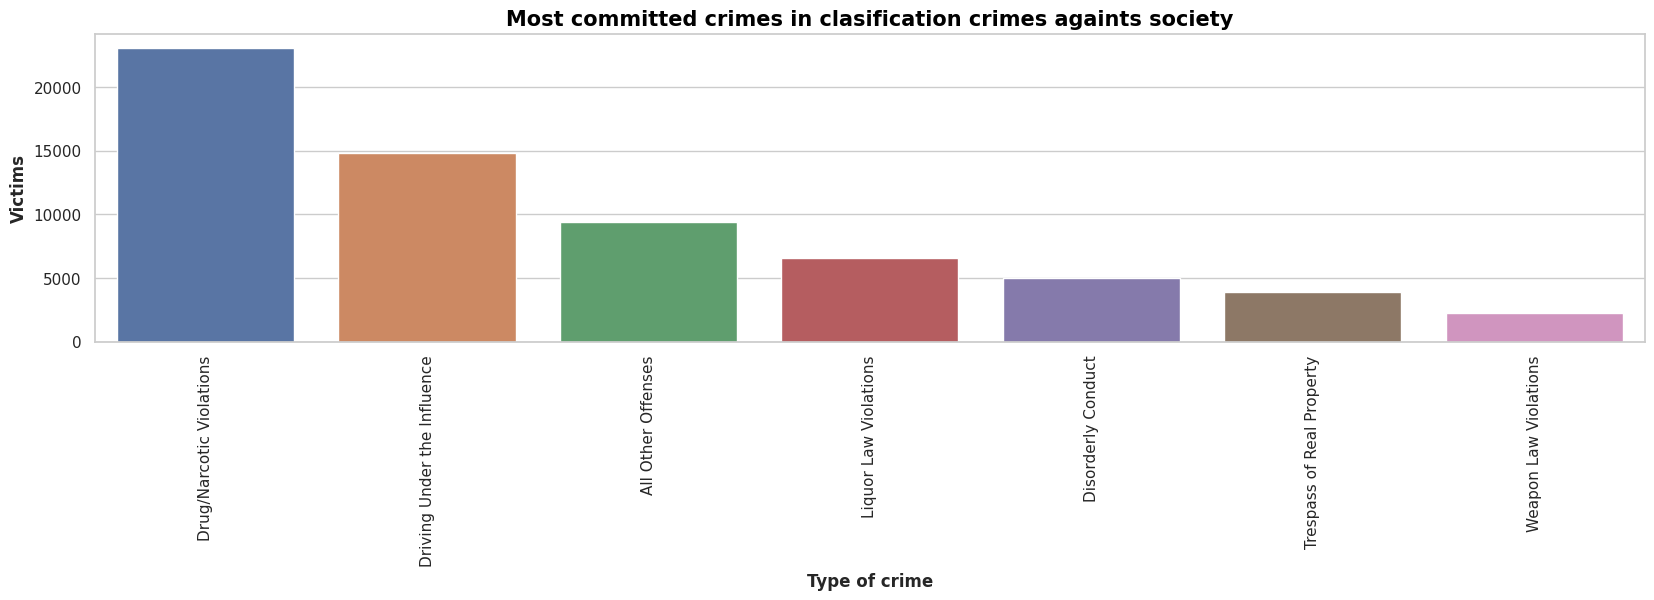

In [86]:
#Grafica
graph_crimes_type2 = df_majorcrimes_type2.loc[df_majorcrimes_type2.victims > 2000]

fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(data=graph_crimes_type2, x = graph_crimes_type2.index, y = "victims")
plt.xticks(rotation=90)
ax.set_xlabel('Type of crime', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Most committed crimes in clasification crimes againts society', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

In [56]:
#Crimenes en ciudades
df_cities_crimetype2= pd.DataFrame(df_crimes_type2.groupby('police_district_name')['victims'].sum())
df_cities_crimetype2 = df_cities_crimetype2.sort_values('victims', ascending=False)
df_cities_crimetype2


,victims
police_district_name,
SILVER SPRING,17056
WHEATON,15693
MONTGOMERY VILLAGE,12074
ROCKVILLE,8797
GERMANTOWN,7730
BETHESDA,5806
CITY OF TAKOMA PARK,1052
TAKOMA PARK,165
OTHER,32


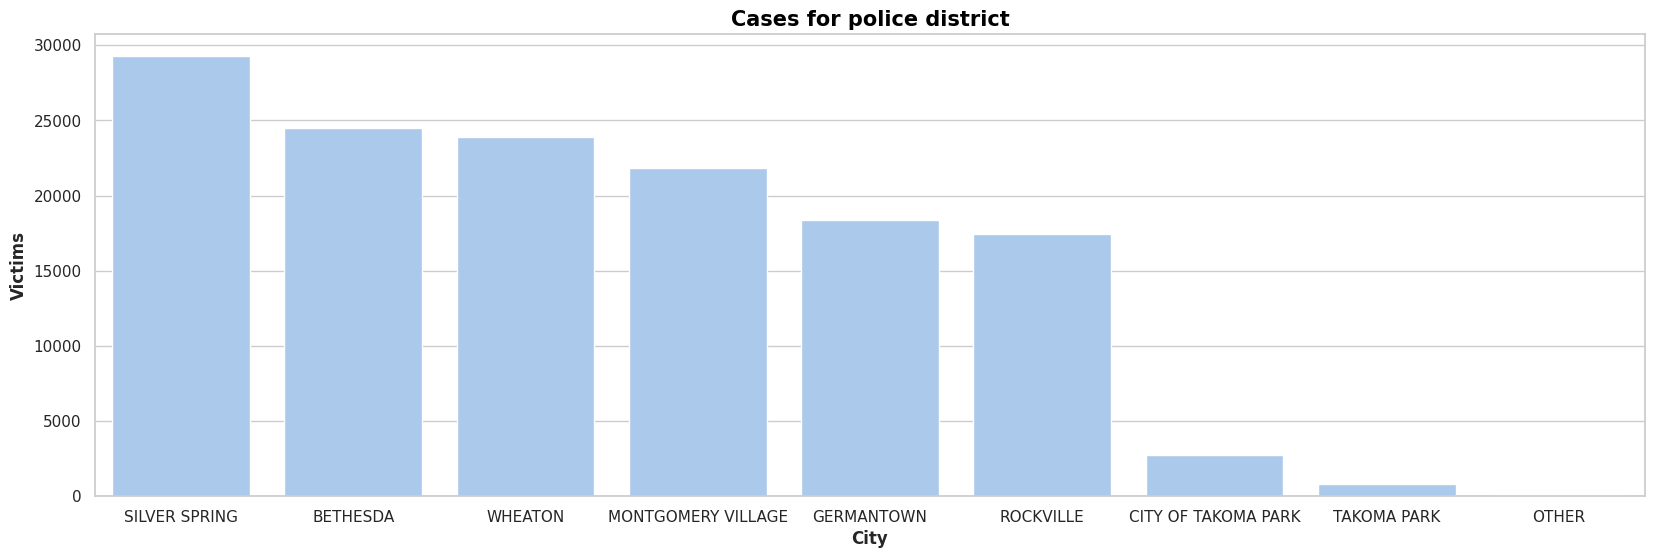

In [77]:
#Grafica crimenes en ciudades
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_cities_crimetype1.index, y="victims", data=df_cities_crimetype1, color="b")
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Cases for police district', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

En las graficas anteriores se puede observar que en el periodo de tiempo estudiado 2017-2021 hubo un total de 68405 casos, el delito más cometido fueron relacionados a drigas y narcoticos con 23040 casos y la ciudad con más refgistros delictivos del tipo **contra la sociedad** fue Silver Spring con un total de 17056 casos.

### **Crimenes contra las personas**

In [58]:
#Segmentación por tipo de crimen
df_crimes_type3 = df_crimes2_clean.loc[df_crimes2_clean.crime_name1 == 'Crime Against Person']
df_crimes_type3

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
7,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,SILVER SPRING,MD,Residence - Apartment/Condo,RD,2016-07-31 23:00:00,39.093783,-77.076369,"(39.0938, -77.0764)",2016,7
8,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,SILVER SPRING,MD,Residence - Apartment/Condo,DR,2016-11-20 09:00:00,39.008359,-76.985601,"(39.0084, -76.9856)",2016,11
15,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,WHEATON,SILVER SPRING,MD,Residence - Apartment/Condo,CT,2016-12-17 22:44:00,39.108360,-77.057510,"(39.1084, -77.0575)",2016,12
16,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - GUN,SILVER SPRING,SILVER SPRING,MD,Parking Lot - Residential,LA,2020-03-27 16:32:00,39.060765,-76.972905,"(39.0608, -76.9729)",2020,3
39,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,ROCKVILLE,POTOMAC,MD,Residence - Single Family,RD,2016-07-28 14:00:00,39.056273,-77.205623,"(39.0563, -77.2056)",2016,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306064,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,ROCKVILLE,GAITHERSBURG,MD,Street - Residential,DR,2021-05-19 17:54:00,39.112161,-77.259854,"(39.1122, -77.2599)",2021,5
306075,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,SILVER SPRING,MD,Residence -Townhouse/Duplex,DR,2021-03-07 01:46:00,39.038441,-76.994999,"(39.0384, -76.995)",2021,3
306077,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,BETHESDA,GLEN ECHO,MD,Convenience Store,BLV,2021-05-18 20:41:00,38.968822,-77.139069,"(38.9688, -77.1391)",2021,5
306087,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,ROCKVILLE,ROCKVILLE,MD,Parking Lot - Metro,PIK,2021-04-02 18:06:00,39.085193,-77.148221,"(39.0852, -77.1482)",2021,4


In [59]:
#Numero de victimas
x = df_crimes_type3.victims.sum()
print('El numero de victimas por crimenes contra la sociedad fue de', x)

El numero de victimas por crimenes contra la sociedad fue de 36381


In [60]:
#Agrupacion de datos por crimenes más cometidos
df_majorcrimes_type3 = pd.DataFrame(df_crimes_type3.groupby('crime_name2')['victims'].sum())
df_majorcrimes_type3 = df_majorcrimes_type3.sort_values('victims', ascending=False)
df_majorcrimes_type3

,victims
crime_name2,
Simple Assault,26115
Aggravated Assault,5149
Forcible Rape,1393
Fondling,1182
Forcible Sodomy,603
Forcible Fondling,596
Intimidation,452
Sexual Assault With An Object,407
All Other Offenses,168


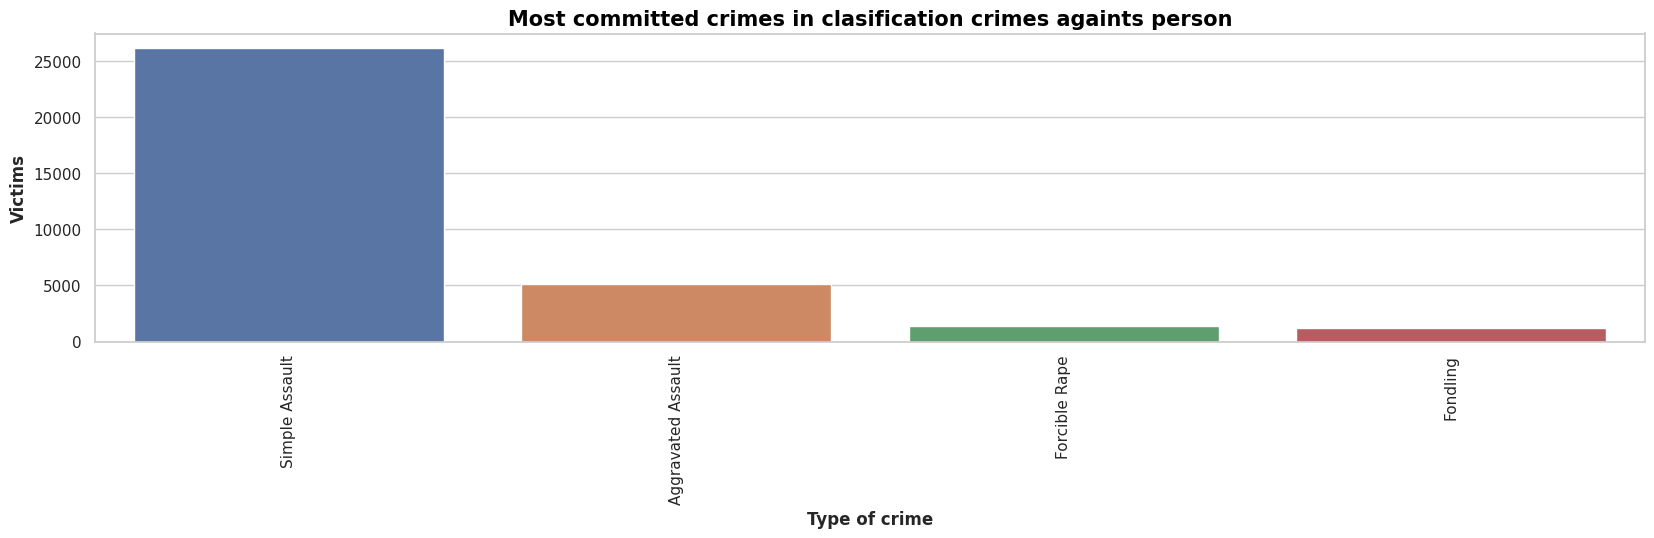

In [78]:
#Grafica
graph_crimes_type3 = df_majorcrimes_type3.loc[df_majorcrimes_type3.victims > 1000]

fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(data=graph_crimes_type3, x = graph_crimes_type3.index, y = "victims")
plt.xticks(rotation=90)
ax.set_xlabel('Type of crime', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Most committed crimes in clasification crimes againts person', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

In [62]:
#Crimenes en ciudades
df_cities_crimetype3= pd.DataFrame(df_crimes_type3.groupby('police_district_name')['victims'].sum())
df_cities_crimetype3 = df_cities_crimetype3.sort_values('victims', ascending=False)
df_cities_crimetype3


,victims
police_district_name,
MONTGOMERY VILLAGE,7728
SILVER SPRING,7341
WHEATON,6906
GERMANTOWN,6146
ROCKVILLE,4192
BETHESDA,3434
CITY OF TAKOMA PARK,491
TAKOMA PARK,110
OTHER,33


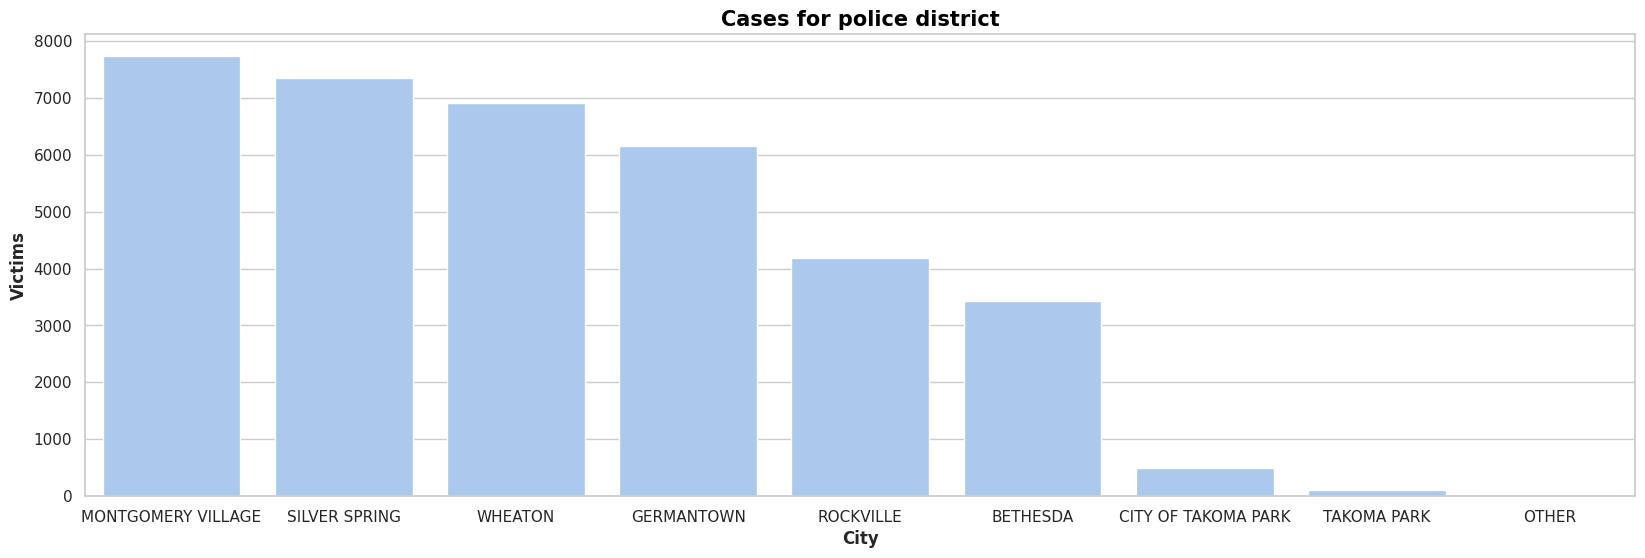

In [79]:
#Grafica crimenes en ciudades
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_cities_crimetype3.index, y="victims", data=df_cities_crimetype3, color="b")
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Cases for police district', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

En las graficas anteriores se puede observar que en el periodo de tiempo estudiado 2017-2021 hubo un total de 36381 vicitimas, el delito más llevado a cabo fue el robo de **asalto simple** con un total de 26115 casos y la ciudad con más actos delictivos del tipo **contra la personas** fue Montgomery Village, registrando 7728 casos.

### **Otros crimenes**

In [64]:
#Segmentación por tipo de crimen
df_crimes_type4 = df_crimes2_clean.loc[df_crimes2_clean.crime_name1 == 'Other']
df_crimes_type4

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
9,1,Other,All Other Offenses,POLICE INFORMATION,WHEATON,SILVER SPRING,MD,Residence -Townhouse/Duplex,AVE,2017-03-08 14:03:00,39.036218,-77.049887,"(39.0362, -77.0499)",2017,3
17,1,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,SILVER SPRING,MD,Residence - Apartment/Condo,DR,2018-04-09 17:00:00,39.045570,-76.991900,"(39.0456, -76.9919)",2018,4
21,1,Other,All Other Offenses,SUDDEN DEATH,WHEATON,SILVER SPRING,MD,Residence - Apartment/Condo,LA,2018-02-15 08:30:00,39.108811,-77.073378,"(39.1088, -77.0734)",2018,2
22,1,Other,All Other Offenses,MENTAL ILLNESS - EMERGENCY PETITION,SILVER SPRING,SILVER SPRING,MD,School/College - DO NOT USE,AVE,2018-10-22 09:00:00,39.055314,-76.995596,"(39.0553, -76.9956)",2018,10
24,1,Other,All Other Offenses,SUDDEN DEATH,WHEATON,SILVER SPRING,MD,Residence - Apartment/Condo,CT,2018-11-18 05:54:00,39.100071,-77.068009,"(39.1001, -77.068)",2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305705,1,Other,All Other Offenses,FIRE (NOT ARSON),MONTGOMERY VILLAGE,GAITHERSBURG,MD,Parking Lot - Rec Center,AVE,2021-05-09 01:08:00,39.135554,-77.191922,"(39.1356, -77.1919)",2021,5
305892,1,Other,NOT NIBRS CODE,TRAFFIC OFFENSES (DESCRIBE OFFENSE),BETHESDA,BETHESDA,MD,Street - In vehicle,RD,2021-04-08 20:03:00,38.990904,-77.155850,"(38.9909, -77.1558)",2021,4
306005,1,Other,All Other Offenses,LITTERING/TRASH DUMPING,WHEATON,ROCKVILLE,MD,Gas Station,AVE,2021-03-21 23:01:00,39.108895,-77.076476,"(39.1089, -77.0765)",2021,3
306061,1,Other,All Other Offenses,FIRE (NOT ARSON),GERMANTOWN,GERMANTOWN,MD,Residence - Apartment/Condo,DR,2021-03-17 19:05:00,39.176926,-77.264317,"(39.1769, -77.2643)",2021,3


In [65]:
#Numero de victimas
y = df_crimes_type4.victims.sum()
print('El numero de victimas por crimenes contra la sociedad fue de', y)

El numero de victimas por crimenes contra la sociedad fue de 63670


In [66]:
#Agrupacion de datos por crimenes más cometidos
df_majorcrimes_type4 = pd.DataFrame(df_crimes_type4.groupby('crime_name3')['victims'].sum())
df_majorcrimes_type4 = df_majorcrimes_type4.sort_values('victims', ascending=False)
df_majorcrimes_type4

,victims
crime_name3,
POLICE INFORMATION,18693
MENTAL ILLNESS - EMERGENCY PETITION,11811
LOST PROPERTY,11008
SUDDEN DEATH,5983
MISSING PERSON,4661
MENTAL ILLNESS,3118
RECOVERED PROPERTY - MONT CO.,2483
RECOVERED PROPERTY - OTHER,1684
OVERDOSE,898


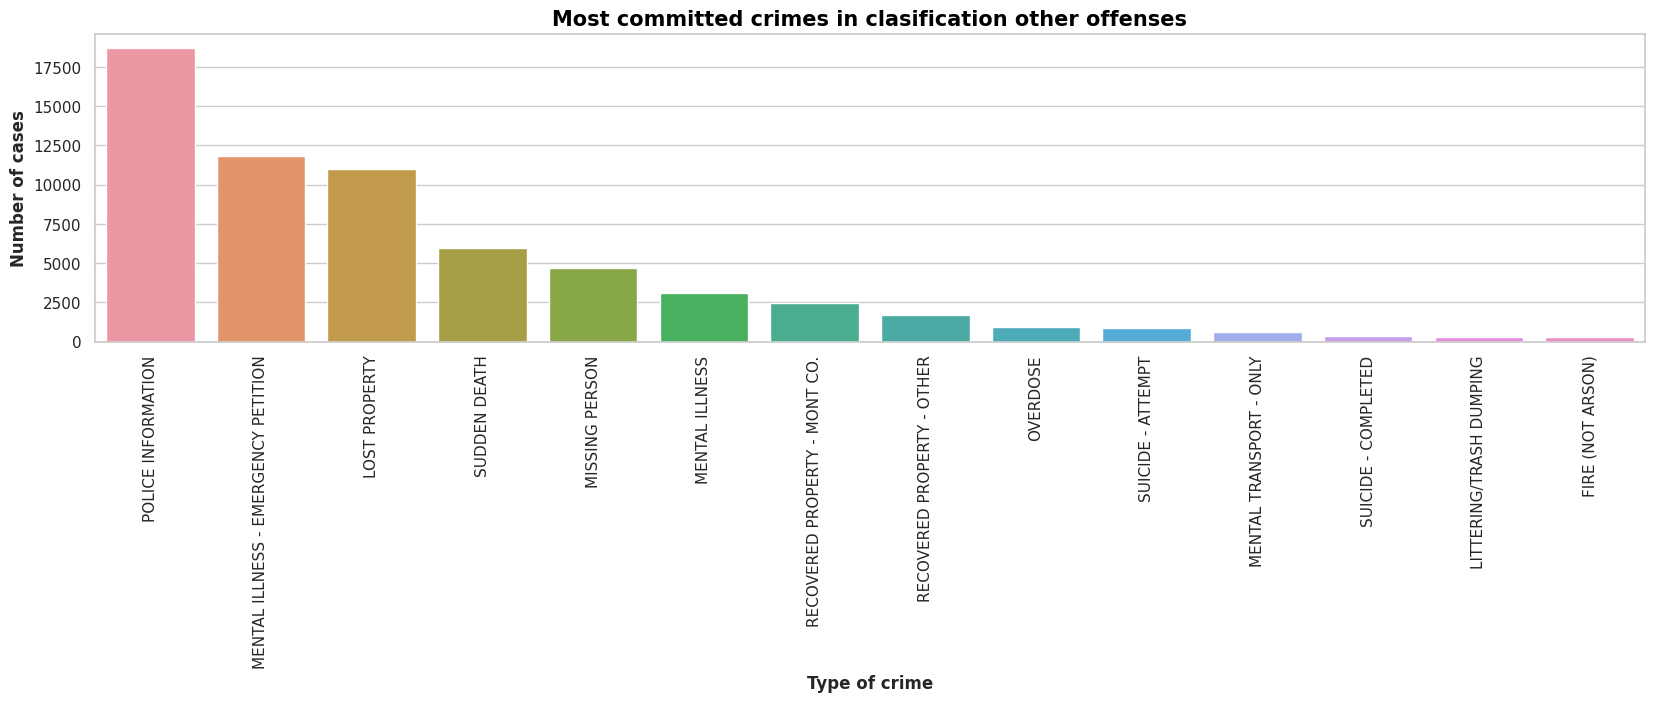

In [88]:
#Grafica
graph_crimes_type4 = df_majorcrimes_type4.loc[df_majorcrimes_type4.victims > 300]

fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(data=graph_crimes_type4, x = graph_crimes_type4.index, y = "victims")
plt.xticks(rotation=90)
ax.set_xlabel('Type of crime', fontweight='bold')
ax.set_ylabel('Number of cases', fontweight='bold')
plt.title('Most committed crimes in clasification other offenses', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

In [68]:
#Crimenes en ciudades
df_cities_crimetype4= pd.DataFrame(df_crimes_type4.groupby('police_district_name')['victims'].sum())
df_cities_crimetype4 = df_cities_crimetype4.sort_values('victims', ascending=False)
df_cities_crimetype4


,victims
police_district_name,
MONTGOMERY VILLAGE,11507
ROCKVILLE,11437
WHEATON,11356
SILVER SPRING,11020
BETHESDA,9210
GERMANTOWN,7600
CITY OF TAKOMA PARK,1253
TAKOMA PARK,206
OTHER,81


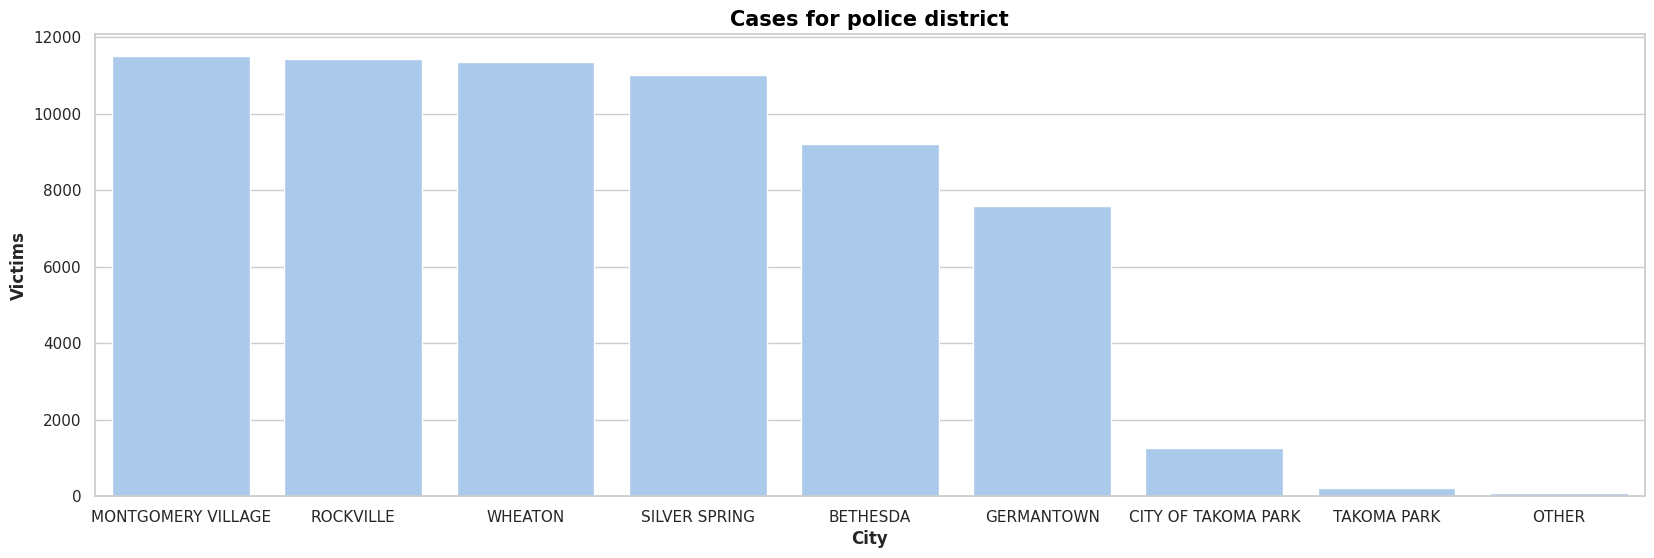

In [81]:
#Grafica crimenes en ciudades
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_cities_crimetype4.index, y="victims", data=df_cities_crimetype4, color="b")
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Victims', fontweight='bold')
plt.title('Cases for police district', fontsize = 15, color = 'black', fontweight='bold')
plt.show()

Durante el periodo de tiempo analizado 2017-2021 también se registraron otros tipos de delitos no clasificados en los anteriormente mencionados y que estan dentro de la clasificación de **otros delitos**. En esta clasificación se registraron 63670 casos, de los cuales el más cometido fue **Información policial** con 18507 casos y la ciudad con más crimenes y delitos registrados fue Montgomery Village con un total de 11507 casos.

### **Delitos no considerados crimenes**

In [70]:
#Segmentación por tipo de crimen/delito
df_crimes_type5 = df_crimes2_clean.loc[df_crimes2_clean.crime_name1 == 'Not a Crime']
df_crimes_type5

,victims,crime_name1,crime_name2,crime_name3,police_district_name,city,state,place,street_type,start_date_time,latitude,longitude,location,year,month
23,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,GERMANTOWN,GERMANTOWN,MD,School/College - DO NOT USE,RD,2018-06-08 09:35:00,39.164720,-77.247313,"(39.1647, -77.2473)",2018,6
427,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,SILVER SPRING,SILVER SPRING,MD,Residence - Apartment/Condo,WAY,2018-08-30 21:00:00,39.081354,-76.936796,"(39.0814, -76.9368)",2018,8
483,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,GERMANTOWN,GERMANTOWN,MD,Residence -Townhouse/Duplex,WAY,2021-10-13 14:10:00,39.185050,-77.237600,"(39.185, -77.2376)",2021,10
783,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,SILVER SPRING,TAKOMA PARK,MD,Residence - Single Family,ST,2021-06-04 18:44:00,38.997950,-76.996700,"(38.998, -76.9967)",2021,6
927,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Residence - Apartment/Condo,DR,2021-07-28 18:00:00,39.118910,-77.215000,"(39.1189, -77.215)",2021,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109941,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,BETHESDA,CABIN JOHN,MD,Residence - Single Family,TER,2022-08-07 08:54:00,38.976790,-77.159300,"(38.9768, -77.1593)",2022,8
111343,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,MONTGOMERY VILLAGE,GAITHERSBURG,MD,Parking Lot - Commercial,RD,2022-07-09 12:30:00,39.141880,-77.221700,"(39.1419, -77.2217)",2022,7
111404,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,ROCKVILLE,GAITHERSBURG,MD,Other/Unknown,DR,2022-07-15 19:04:00,39.113040,-77.236300,"(39.113, -77.2363)",2022,7
111448,1,Not a Crime,Runaway,JUVENILE - RUNAWAY,SILVER SPRING,SILVER SPRING,MD,Residence - Apartment/Condo,BLV,2022-07-21 02:45:00,39.087020,-76.940400,"(39.087, -76.9404)",2022,7


In [71]:
#Numero de casos
z = df_crimes_type5.victims.sum()
print('El numero de victimas por crimenes contra la sociedad fue de', z)

El numero de victimas por crimenes contra la sociedad fue de 3575


In [72]:
#Agrupacion de datos por delito más cometido
df_majorcrimes_type5 = pd.DataFrame(df_crimes_type5.groupby('crime_name3')['victims'].sum())
df_majorcrimes_type5 = df_majorcrimes_type5.sort_values('victims', ascending=False)
df_majorcrimes_type5

,victims
crime_name3,
JUVENILE - RUNAWAY,3575


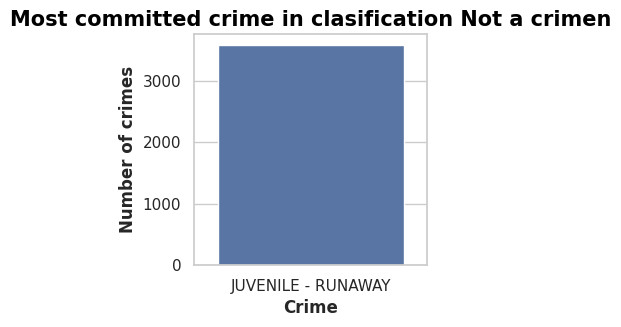

In [91]:
#Grafica
graph_crimes_type5 = df_majorcrimes_type5.loc[df_majorcrimes_type5.victims>3000]

fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(data=graph_crimes_type5, x = graph_crimes_type5.index, y = "victims")
plt.xticks(rotation=0)
ax.set_xlabel('Crime', fontweight='bold')
ax.set_ylabel('Number of crimes', fontweight='bold')
plt.title('Most committed crime in clasification Not a crimen',  fontsize = 15, color = 'black', fontweight='bold')
plt.show()

In [74]:
#Delito en ciudades
df_cities_crimetype5= pd.DataFrame(df_crimes_type5.groupby('police_district_name')['victims'].sum())
df_cities_crimetype5 = df_cities_crimetype5.sort_values('victims', ascending=False)
df_cities_crimetype5


,victims
police_district_name,
WHEATON,966
MONTGOMERY VILLAGE,761
GERMANTOWN,579
SILVER SPRING,569
BETHESDA,384
ROCKVILLE,247
CITY OF TAKOMA PARK,66
OTHER,2
TAKOMA PARK,1


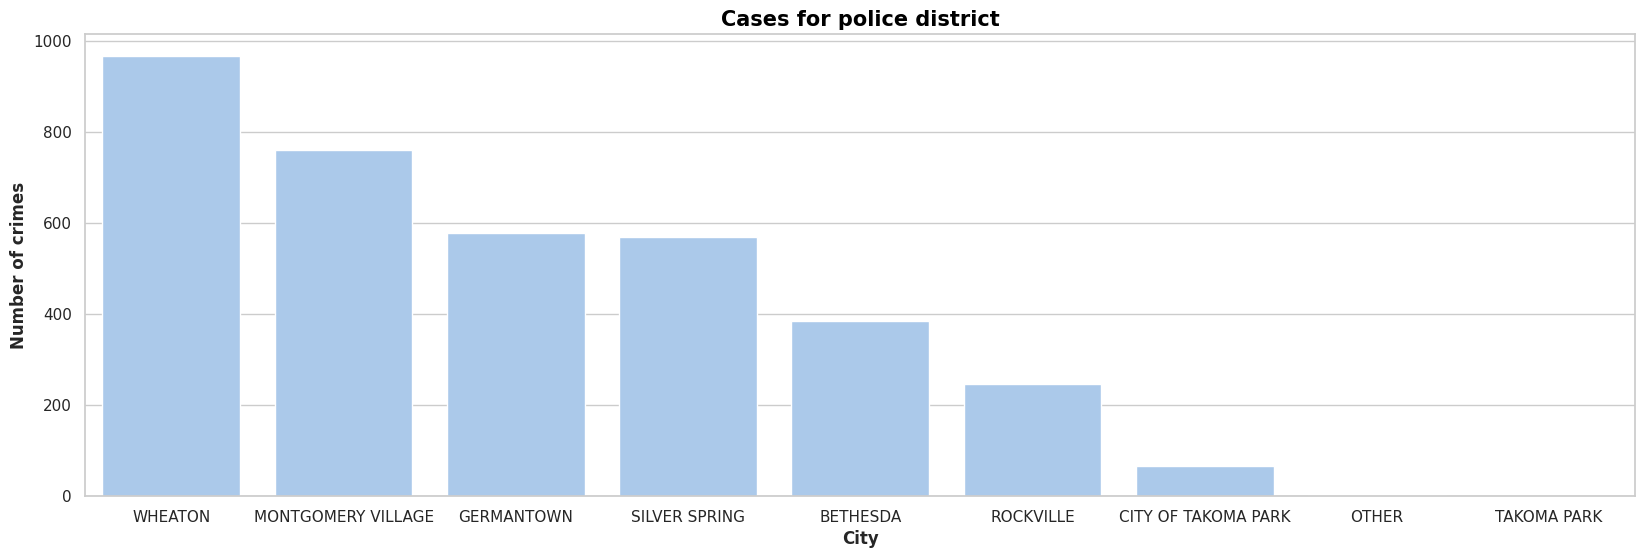

In [84]:
#Grafica delito en ciudades
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x=df_cities_crimetype5.index, y="victims", data=df_cities_crimetype5, color="b")
ax.set_xlabel('City', fontweight='bold')
ax.set_ylabel('Number of crimes', fontweight='bold')
plt.title('Cases for police district',  fontsize = 15, color = 'black', fontweight='bold')
plt.show()

En la data estudiada tambien se registró un tipo de delito que no es considerado un crimen. Este delito es denominado **Huida juvenil**, con un total de 3575 casos, de los cuales el mayor numero de casos se registro en la ciudad de Wheaton con un total de 966 registros.